# Intervalos de confiança

In [1]:
import numpy as np
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import math

In [2]:
dados = np.array([126. , 129.5, 133. , 133. , 136.5, 136.5, 140. , 140. , 140. ,
                  140. , 143.5, 143.5, 143.5, 143.5, 143.5, 143.5, 147. , 147. ,
                  147. , 147. , 147. , 147. , 147. , 150.5, 150.5, 150.5, 150.5,
                  150.5, 150.5, 150.5, 150.5, 154. , 154. , 154. , 154. , 154. ,
                  154. , 154. , 154. , 154. , 157.5, 157.5, 157.5, 157.5, 157.5,
                  157.5, 157.5, 157.5, 157.5, 157.5, 161. , 161. , 161. , 161. ,
                  161. , 161. , 161. , 161. , 161. , 161. , 164.5, 164.5, 164.5,
                  164.5, 164.5, 164.5, 164.5, 164.5, 164.5, 168. , 168. , 168. ,
                  168. , 168. , 168. , 168. , 168. , 171.5, 171.5, 171.5, 171.5,
                  171.5, 171.5, 171.5, 175. , 175. , 175. , 175. , 175. , 175. ,
                  178.5, 178.5, 178.5, 178.5, 182. , 182. , 185.5, 185.5, 189., 192.5])

In [3]:
n = len(dados)
n

100

In [5]:
media = np.mean(dados)
media

159.25

In [6]:
desvio_padrao = np.std(dados)
desvio_padrao

13.65

## Intervalo de confiança manual

In [7]:
alpha = 0.05 / 2 #95% de confiabilidade
alpha

0.025

In [8]:
1 - alpha # Buscar na tabela Z

0.975

In [9]:
z = norm.ppf(1 - alpha)
z

1.959963984540054

In [10]:
x_inferior = media - z * (desvio_padrao / math.sqrt(n))
x_inferior

156.57464916110283

In [11]:
x_superior = media + z * (desvio_padrao / math.sqrt(n))
x_superior

161.92535083889717

In [13]:
margem_erro = abs(media - x_superior)
margem_erro

2.675350838897174

C:\Users\danie\AppData\Local\Temp\ipykernel_10264\2425563881.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dados)


<AxesSubplot: ylabel='Density'>

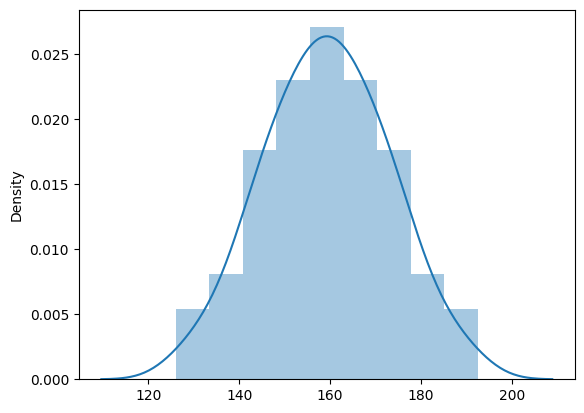

In [14]:
sns.distplot(dados)

## Intervalo de confiança com scipy

In [16]:
stats.sem(dados)

1.3718766178288244

In [18]:
desvio_padrao/ math.sqrt(n - 1)

1.3718766178288246

In [20]:
intervalos = norm.interval(0.95, media, stats.sem(dados))
intervalos

(156.5611712378229, 161.9388287621771)

In [21]:
margem_erro = abs(media - intervalos[1])
margem_erro


2.68882876217711

## Diferente niveis de confiança

In [22]:
intervalos = norm.interval(0.99, media, stats.sem(dados))
intervalos

(155.71628000694295, 162.78371999305705)

In [23]:
margem_erro = abs(media - intervalos[1])
margem_erro

3.5337199930570478

## Distribuição T Student

In [31]:
dados = np.array([149. , 160., 147., 189., 175., 168., 156., 160., 152.])

In [33]:
n = len(dados)
n

9

In [34]:
media = dados.mean()
media

161.77777777777777

In [35]:
desvio_padrao = np.std(dados)
desvio_padrao

12.786953227391823

In [36]:
from scipy.stats import t

In [37]:
intervalos = t.interval(0.95, n - 1, media, stats.sem(dados, ddof = 0))
intervalos

(151.9488554388298, 171.60670011672573)

In [38]:
margem_erro = media - intervalos[0]
margem_erro

9.828922338947962